# Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
import seaborn as sns
import numpy as np

# Dataset

In [24]:
df = pd.read_csv('scaled_filtered_24_4_10.csv')
display(df.head(5))

,Unnamed: 0,combat_id,start_time,number_of_rounds,player_ids,player_info,monsters_info,party_size,total_slots,total_max_slots,...,Cleric,Warlock,Ranger,Barbarian,Druid,Monk,Sorcerer,Rogue,weighted_monster_level,weighted_spell_slots
0,1,1653817902-15ec25a2-6757-4ceb-ac41-d44352b97705,1.653818e+09,1,['209330647903743785'],"[{'hp_ratio': (65, 65), 'class': [('Ranger', 1...",[{'monster_id': 'c0cdb522-64c2-42ee-b1a8-6ef22...,1,"{'1': 4, '2': 3, '3': 2, '4': 0, '5': 0, '6': ...","{'1': 4, '2': 3, '3': 2, '4': 0, '5': 0, '6': ...",...,0,0,1,0,0,0,0,0,4.0,139
1,14,1653869871-e7fd0606-de62-4688-a55b-ae4c25a14beb,1.653870e+09,2,['176588704091156599'],"[{'hp_ratio': (0, 38), 'class': [('Monk', 4), ...",[{'monster_id': '3bdb4cc1-6ca9-47e8-9610-d68ef...,1,"{'1': 2, '2': 0, '3': 0, '4': 0, '5': 0, '6': ...","{'1': 2, '2': 0, '3': 0, '4': 0, '5': 0, '6': ...",...,1,0,0,0,0,1,0,0,5.0,12
2,15,1653870265-3912208d-8851-4441-90a7-9473068eb93e,1.653870e+09,4,"['743069156064144035', '219174602203404794']","[{'hp_ratio': (33, 73), 'class': [('Druid', 9)...",[{'monster_id': '203bce70-7a28-4c79-a990-fba6f...,2,"{'1': 4, '2': 3, '3': 3, '4': 3, '5': 1, '6': ...","{'1': 7, '2': 3, '3': 3, '4': 3, '5': 1, '6': ...",...,1,0,0,1,1,0,0,0,4.0,367
3,18,1653872787-dd8c22a6-4f2b-46f9-901a-17c887a64f29,1.653873e+09,6,"['743069156064144035', '219174602203404794']","[{'hp_ratio': (61, 81), 'class': [('Barbarian'...",[{'monster_id': 'aed32ba7-a864-41ca-a4b3-1314d...,2,"{'1': 7, '2': 3, '3': 3, '4': 3, '5': 2, '6': ...","{'1': 7, '2': 3, '3': 3, '4': 3, '5': 2, '6': ...",...,1,0,0,1,1,0,0,0,12.0,449
4,32,1653896334-b9e6fdf9-8623-4f4f-999f-723261516a9f,1.653896e+09,2,"['244501817820067418', '252441296436920394', '...","[{'hp_ratio': (42, 47), 'class': [('Paladin', ...",[{'monster_id': '6acfea01-ab7a-4a14-b17c-e05a9...,4,"{'1': 18, '2': 11, '3': 5, '4': 3, '5': 2, '6'...","{'1': 19, '2': 11, '3': 5, '4': 3, '5': 2, '6'...",...,1,1,0,1,1,0,0,0,1.0,871


In [25]:
"""Additional filters to the data for EDA purposes"""
filtered_df= df[df['party_total_hpratio']<1]

In [26]:
lost_combats = len(df['combat_id'].unique()) - len(filtered_df['combat_id'].unique())
print(f"Number of combats lost to the filter: {lost_combats}")
len(filtered_df[filtered_df['party_total_hpratio'] == 0])

Number of combats lost to the filter: 4619


332

In [27]:
filtered_df = filtered_df[filtered_df['party_size'] <= 10]

In [28]:
lost_combats = len(df['combat_id'].unique()) - len(filtered_df['combat_id'].unique())
print(f"Number of combats lost to the filter: {lost_combats}")
len(filtered_df[filtered_df['party_total_hpratio'] == 0])

Number of combats lost to the filter: 4619


332

In [29]:
filtered_df = filtered_df[filtered_df['party_total_level']/filtered_df['party_size']  <= 20]

In [30]:
lost_combats = len(df['combat_id'].unique()) - len(filtered_df['combat_id'].unique())
print(f"Number of combats lost to the filter: {lost_combats}")
len(filtered_df[filtered_df['party_total_hpratio'] == 0])

Number of combats lost to the filter: 4646


332

In [31]:
filtered_df = filtered_df[filtered_df['party_total_ac']/filtered_df['party_size']  <= 38]

In [32]:
lost_combats = len(df['combat_id'].unique()) - len(filtered_df['combat_id'].unique())
print(f"Number of combats lost to the filter: {lost_combats}")
len(filtered_df[filtered_df['party_total_hpratio'] == 0])

Number of combats lost to the filter: 4653


332

In [33]:
filtered_df = filtered_df[filtered_df['party_total_precombat_hp']/filtered_df['party_size'] <350]

In [34]:
lost_combats = len(df['combat_id'].unique()) - len(filtered_df['combat_id'].unique())
print(f"Number of combats lost to the filter: {lost_combats}")
len(filtered_df[filtered_df['party_total_hpratio'] == 0])

Number of combats lost to the filter: 4655


332

# Defining extra variables

In [35]:
filtered_df['avg_party_level'] = filtered_df['party_total_level'] / filtered_df['party_size']
filtered_df['avg_hp_ratio'] = (filtered_df['party_total_precombat_hp']-filtered_df['party_total_postcombat_hp'])/ filtered_df['party_max_hp']

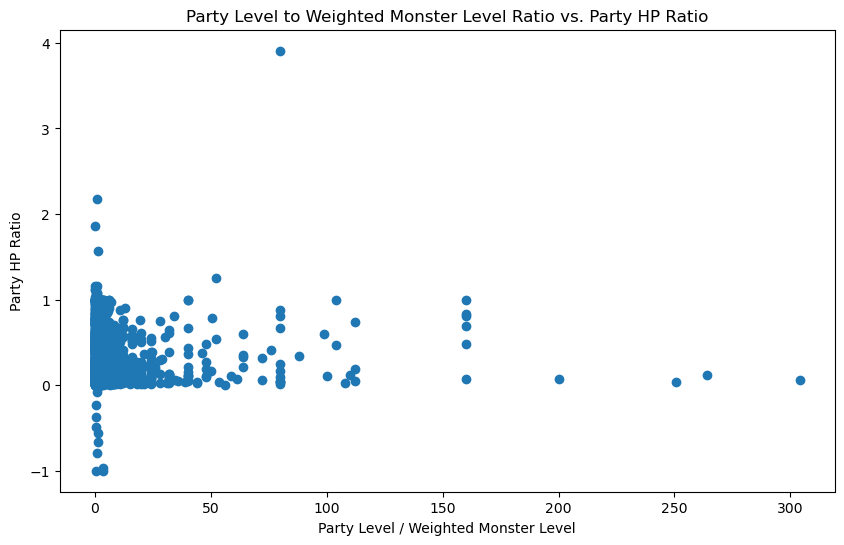

In [36]:
filtered_df['weighted_monster_level'].replace(0, np.nan, inplace=True)

""" Calculate the ratio of average party level to average monster level"""
filtered_df['level_ratio'] = filtered_df['party_total_level'] / filtered_df['weighted_monster_level']

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['level_ratio'],filtered_df['avg_hp_ratio'])
plt.xlabel('Party Level / Weighted Monster Level')
plt.ylabel('Party HP Ratio')
plt.title('Party Level to Weighted Monster Level Ratio vs. Party HP Ratio')
plt.show()


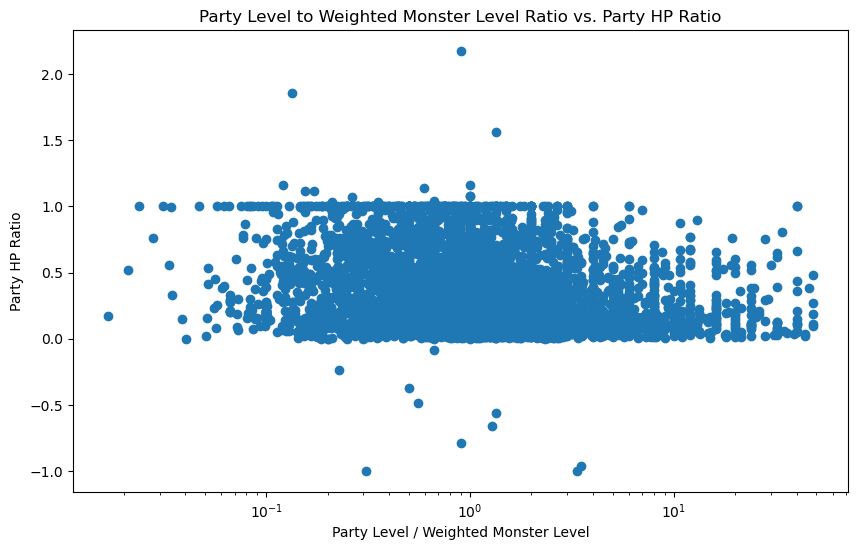

320

In [37]:
filtered_df = filtered_df[(filtered_df['level_ratio'] <50)]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['level_ratio'],filtered_df['avg_hp_ratio'])
plt.xscale('log')
plt.xlabel('Party Level / Weighted Monster Level')
plt.ylabel('Party HP Ratio')
plt.title('Party Level to Weighted Monster Level Ratio vs. Party HP Ratio')
plt.show()
len(filtered_df[filtered_df['party_total_hpratio'] == 0])


# Start Building TPK Classifier

In [38]:
"""creating new column where tpk is 1 and no tpk is 0"""
filtered_df['tpk'] = (filtered_df['party_total_postcombat_hp'] == 0).astype(int)

In [39]:
"""Our data has less tpks than not, we should balance out the data. Separating majority from the minority into two different dataframes"""
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = filtered_df[filtered_df.tpk == 0]
df_minority = filtered_df[filtered_df.tpk == 1]

In [40]:
""" Downsample majority class"""
df_majority_downsampled = resample(df_majority,
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),     # to match minority class
                                   random_state=123) 

""" Combine minority class with downsampled majority class"""
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_balanced.tpk.value_counts())


tpk
0    310
1    310
Name: count, dtype: int64


In [42]:

# define features
feature_columns = ['party_total_level', 'weighted_monster_level', 'party_size', 'monster_number']
X = df_balanced[feature_columns]
y = df_balanced['tpk']



In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Logistic Regression Classifier

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize the classifier
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.57      0.68       104
           1       0.62      0.88      0.72        82

    accuracy                           0.70       186
   macro avg       0.74      0.72      0.70       186
weighted avg       0.75      0.70      0.70       186



In [46]:
# Predicting probabilities
y_pred_proba_lr = model.predict_proba(X_test)[:, 1]  # Get the probability of TPK


In [47]:

predictions_lr_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability of TPK': y_pred_proba_lr
})

print(predictions_lr_df.head(20))


       Actual  Predicted  Probability of TPK
8608        0          0            0.374908
9298        1          1            0.711288
4801        0          0            0.407129
10629       0          0            0.174136
7800        0          1            0.663297
10424       1          1            0.614164
5457        0          1            0.706666
1612        1          1            0.556578
813         1          1            0.534776
7846        1          1            0.748975
7184        0          0            0.177322
6220        1          0            0.489870
4293        0          0            0.289451
5818        0          0            0.357677
1198        0          0            0.279424
5718        0          1            0.675965
9180        1          1            0.726738
4331        1          1            0.692489
4947        0          0            0.022228
3317        1          1            0.739119


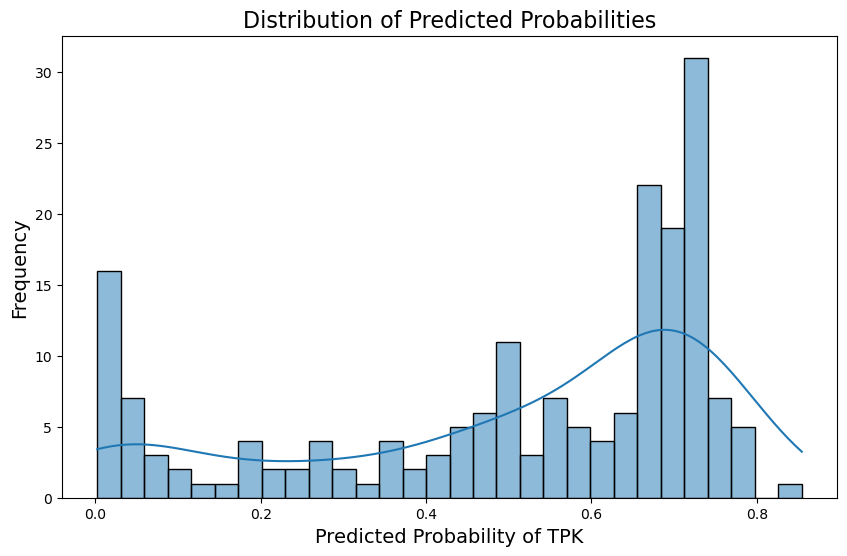

In [48]:

# Plotting distribution of predicted probabilities
plt.figure(figsize=(10, 6))
sns.histplot(y_pred_proba_lr, bins=30, kde=True)
plt.title('Distribution of Predicted Probabilities', fontsize=16)
plt.xlabel('Predicted Probability of TPK', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig('probability_distribution.png', dpi=300, transparent=True)
plt.show()


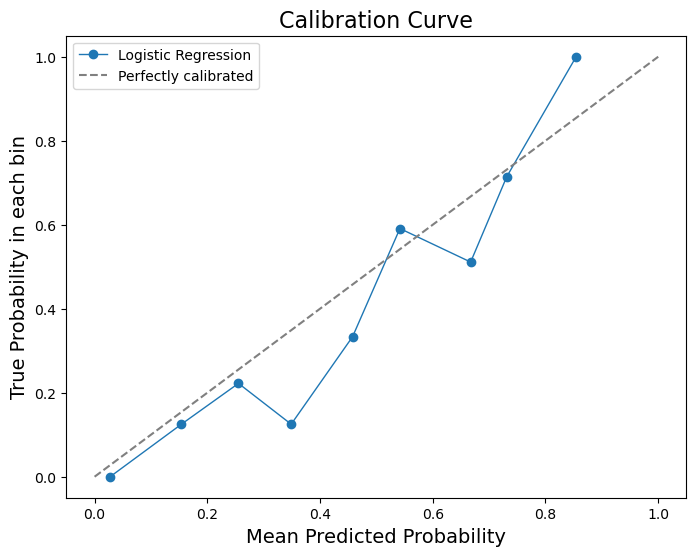

In [49]:
from sklearn.calibration import calibration_curve

# Get true probabilities and predicted probabilities
true_prob, pred_prob = calibration_curve(y_test, y_pred_proba_lr, n_bins=10)

# Plotting the calibration curve
plt.figure(figsize=(8, 6))
plt.plot(pred_prob, true_prob, marker='o', linewidth=1, label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability', fontsize=14)
plt.ylabel('True Probability in each bin', fontsize=14)
plt.legend()
plt.title('Calibration Curve', fontsize=16)
plt.savefig('calibration_curve.png', dpi=300, transparent=True)
plt.show()


# Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier


In [177]:
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [178]:
# Predicting classes
y_pred_dt = dt_model.predict(X_test)
print(classification_report(y_test, y_pred_dt))

# Predicting probabilities
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class


              precision    recall  f1-score   support

           0       0.75      0.74      0.75       104
           1       0.68      0.70      0.69        82

    accuracy                           0.72       186
   macro avg       0.72      0.72      0.72       186
weighted avg       0.72      0.72      0.72       186



In [179]:
# Create a DataFrame to view predictions and their probabilities
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_dt,
    'Probability of TPK': y_pred_proba_dt
})

print(predictions_df.head(20))


       Actual  Predicted  Probability of TPK
8608        0          0            0.000000
9298        1          1            1.000000
4801        0          0            0.000000
10629       0          0            0.000000
7800        0          0            0.000000
10424       1          1            1.000000
5457        0          1            1.000000
1612        1          1            1.000000
813         1          0            0.000000
7846        1          1            1.000000
7184        0          0            0.000000
6220        1          1            1.000000
4293        0          0            0.000000
5818        0          0            0.000000
1198        0          0            0.000000
5718        0          0            0.125000
9180        1          1            1.000000
4331        1          0            0.333333
4947        0          0            0.000000
3317        1          1            1.000000


# Comparing Classifier performance

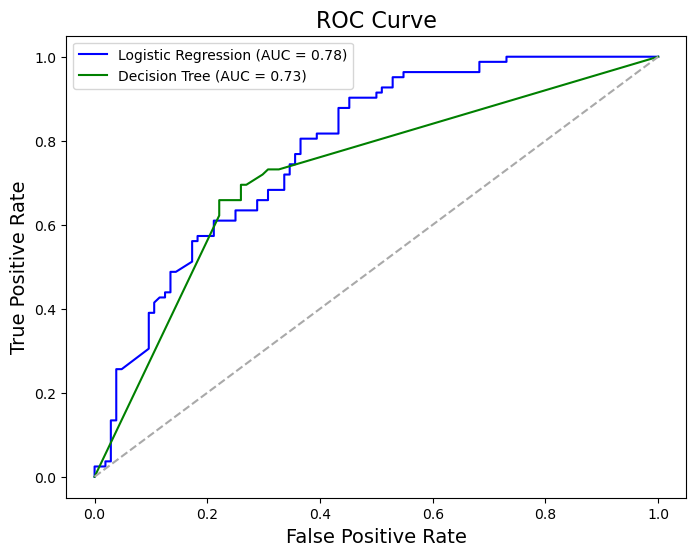

In [194]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

""" Calculating ROC curve from both models: Logistic Regression and Decision Tree"""
fpr_log, tpr_log, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:, 1])

# Calculate AUC (Area under the ROC Curve)
auc_log = auc(fpr_log, tpr_log)
auc_dt = auc(fpr_dt, tpr_dt)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='green')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend()
plt.savefig('roccurve.png', dpi=300, transparent=True)
plt.show()
